<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2022/23 Term 2
</div>

# CS105 Group Project Submission

-----
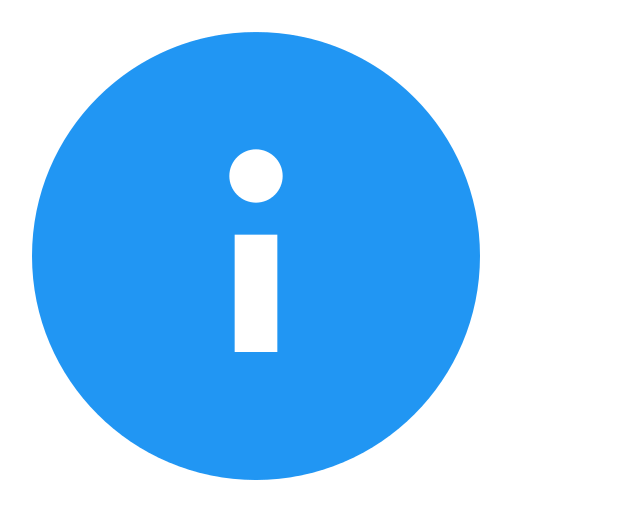Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

#### Section: G4
#### Team: Group 5
#### Members:
1. Chew Hui Feng
2. Eric Ng Yong Wei
3. Colin Teo Jun Wei
4. Tan Li Yang Samuel
5. Martin Ong Yan Jie

#### Dataset: Credit Dataset

### Importing libraries

In [1]:
# General libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt

In [2]:
# Loading dataset 
df = pd.read_csv('Data Files\credit.csv') 

In [3]:
# set pandas to display all columns
pd.set_option('display.max_columns', None)

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

The dataset mainly specifies various information about past applicants for a credit facility in a bank. The information also includes the approval status of each applicant which can be useful to train AI models in the future to filter new applicants of the credit facility

**b.** State the size of the dataset

In [4]:
num_rows, num_cols = df.shape
print(f'# of rows: {num_rows}')
print(f'# of columns: {num_cols}')

# of rows: 1000
# of columns: 23


In [5]:
print("These are the columns in the dataset:")
df.columns

These are the columns in the dataset:


Index(['ID', 'Checking_Account', 'Duration', 'Payment_Status', 'Purpose',
       'Amount', 'Savings_Account', 'Employment', 'Installment',
       'Personal_Status', 'Guarantors', 'Residence_Length', 'Assets', 'Age',
       'Credit_Rating', 'Existing_Credits', 'Housing_Type', 'Num_Credits',
       'Occupation', 'Dependents', 'Telephone', 'Foreign_Worker', 'Approval'],
      dtype='object')

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

In [6]:
df.head(10)

,ID,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval
0,1,1,24,2,0,1442,1,4,4,2,1,4.0,3,23,4,3,1,2.0,3,1,1,1,0
1,2,4,24,2,3,1413,1,3,4,4,1,2.0,2,28,59,3,2,1.0,3,1,1,1,1
2,3,1,12,2,3,2214,1,3,4,3,1,3.0,2,24,26,3,2,1.0,2,1,1,1,1
3,4,1,30,2,2,3108,1,2,2,1,1,4.0,2,31,26,3,2,1.0,2,1,1,1,0
4,5,4,54,0,1,9436,5,3,2,3,1,2.0,2,39,97,3,2,1.0,2,2,1,1,1
5,6,2,36,1,4,3990,5,2,3,2,1,2.0,4,29,19,1,2,1.0,1,1,1,1,1
6,7,2,48,2,3,10961,4,4,1,3,2,2.0,4,27,19,1,2,2.0,3,1,2,1,0
7,8,1,12,4,0,2171,1,3,4,3,1,4.0,2,38,98,1,2,2.0,2,1,1,2,1
8,9,1,24,2,2,1747,1,2,4,3,2,1.0,2,24,92,3,2,1.0,2,1,1,2,1
9,10,2,30,1,2,3496,4,3,4,3,1,2.0,3,34,72,2,2,1.0,3,2,2,1,1


First 10 rows of the dataset to get an idea about the dataset

In [7]:
df.dtypes

ID                    int64
Checking_Account      int64
Duration              int64
Payment_Status        int64
Purpose               int64
Amount                int64
Savings_Account       int64
Employment            int64
Installment           int64
Personal_Status       int64
Guarantors            int64
Residence_Length    float64
Assets                int64
Age                   int64
Credit_Rating         int64
Existing_Credits      int64
Housing_Type          int64
Num_Credits         float64
Occupation            int64
Dependents            int64
Telephone             int64
Foreign_Worker        int64
Approval              int64
dtype: object

`df.dtypes` does not accurately reflect whether the column datatype is numerical or categorical hence we will use data dictionary for our "credit" dataset

<table> 
    <tr>
        <th> Column Name </th>
        <th> Explanation </th>
        <th> Datatype </th>
        <th> Expected Values </th>
        <th> Numerical/Categorical </th>
    </tr>
    <tr>
        <td> ID </td>
        <td> Unique id of an applicant </td>
        <td> Integer </td>
        <td> 1 to #rows </td>
        <td> Numerical </td>
    </tr>
    <tr>
        <td> Checking_Account </td>
        <td> Status of checking account </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Payment_Status </td>
        <td> Credit history of an applicant </td>
        <td> Integer </td>
        <td> 0 to 4</td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Purpose </td>
        <td> Type of purpose for applying credit </td>
        <td> Integer </td>
        <td> 0 to 10 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Amount </td>
        <td> Amount of credit applying for </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
    </tr>
     <tr>
        <td> Savings_Account </td>
        <td> Status type of savings account </td>
        <td> Integer </td>
        <td> 1 to 5 </td>
         <td> Categorical </td>
    </tr>
    <tr>
        <td> Employment </td>
        <td> Length of current employment </td>
        <td> Integer </td>
        <td> 1 to 5 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Installment </td>
        <td> Installment rate as percentage of disposable income </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
    </tr>
    <tr>
        <td> Personal_Status </td>
        <td> Marital status and sex </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Guarantors </td>
        <td> If other debtors or guarantor exists </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Residence_Length </td>
        <td> Length of staying in current residence </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Assets </td>
        <td> Asset ownership type</td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Age </td>
        <td> Age of applicant in years </td>
        <td> Integer </td>
        <td> Positive integer value </td>
        <td> Numerical </td>
    </tr>
    <tr>
        <td> Credit_Rating </td>
        <td> Credit rating of applicant </td>
        <td> Integer </td>
        <td> 1 to 100 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Existing_Credit </td>
        <td> Other existing credit in places and what type </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Housing_Type </td>
        <td> Type of apartment </td>
        <td> Integer </td>
        <td> 1 to 3 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Num_Credits </td>
        <td> Number of existing credits </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
    </tr>
    <tr>
        <td> Occupation </td>
        <td> Occupation type </td>
        <td> Integer </td>
        <td> 1 to 4 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Dependents </td>
        <td> Number of dependents of applicant </td>
        <td> Integer </td>
        <td> Integer value </td>
        <td> Numerical </td>
    </tr>
    <tr>
        <td> Telephone </td>
        <td> Has telephone or not </td>
        <td> Integer </td>
        <td> 1, 2 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Foreign_Worker </td>
        <td> Foreign worker or not </td>
        <td> Integer </td>
        <td> 1, 2 </td>
        <td> Categorical </td>
    </tr>
    <tr>
        <td> Approval </td>
        <td> Loan approval status, 1 is approved, 2 is not approved </td>
        <td> Integer </td>
        <td> 0, 1 </td>
        <td> Categorical </td>
    </tr>
        
</table>

### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [8]:
print("Number of data in each column: ")
df.count()

Number of data in each column: 


ID                  1000
Checking_Account    1000
Duration            1000
Payment_Status      1000
Purpose             1000
Amount              1000
Savings_Account     1000
Employment          1000
Installment         1000
Personal_Status     1000
Guarantors          1000
Residence_Length     966
Assets              1000
Age                 1000
Credit_Rating       1000
Existing_Credits    1000
Housing_Type        1000
Num_Credits          969
Occupation          1000
Dependents          1000
Telephone           1000
Foreign_Worker      1000
Approval            1000
dtype: int64

There are two columns with missing data which are `Residence_Length` and `Num_Credits`

In [9]:
print("Percentage of data that is not missing: ")
df.count() / num_rows 

Percentage of data that is not missing: 


ID                  1.000
Checking_Account    1.000
Duration            1.000
Payment_Status      1.000
Purpose             1.000
Amount              1.000
Savings_Account     1.000
Employment          1.000
Installment         1.000
Personal_Status     1.000
Guarantors          1.000
Residence_Length    0.966
Assets              1.000
Age                 1.000
Credit_Rating       1.000
Existing_Credits    1.000
Housing_Type        1.000
Num_Credits         0.969
Occupation          1.000
Dependents          1.000
Telephone           1.000
Foreign_Worker      1.000
Approval            1.000
dtype: float64

Both `Residence_Length` and `Num_Credits` have less than 5% missing data

In [10]:
print("Number of missing data in each column: ")
df.isna().sum()

Number of missing data in each column: 


ID                   0
Checking_Account     0
Duration             0
Payment_Status       0
Purpose              0
Amount               0
Savings_Account      0
Employment           0
Installment          0
Personal_Status      0
Guarantors           0
Residence_Length    34
Assets               0
Age                  0
Credit_Rating        0
Existing_Credits     0
Housing_Type         0
Num_Credits         31
Occupation           0
Dependents           0
Telephone            0
Foreign_Worker       0
Approval             0
dtype: int64

`Residence_Length` have 34 rows missing data <br>
`Num_Credits` have 31 rows of missing data

In [11]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df [missing_value_df ['percent_missing'] !=0]

,column_name,percent_missing
Residence_Length,Residence_Length,3.4
Num_Credits,Num_Credits,3.1


Now let's take a look at actual percentage of data misisng from these two rows <br>
`Residence_Length` have 3.4% missing data and `Num_Credits` have 3.1% missing data which are not too significant, hence there is no need to drop  the whole column

In [12]:
df['Num_Credits'].value_counts()

1.0    615
2.0    321
3.0     27
4.0      6
Name: Num_Credits, dtype: int64

In [13]:
df = df[df['Num_Credits'].notna()]
num_rows = df.shape[0]

Based on the description and the existing data provided for this field `Num_Credits` clearly shows the number of existing credits for an applicant. We can see that there are no cases where the applicants don't have any existing credits which is the value 0 as shown above, but we have values 1, 2, 3, 4. It is very unlikely in 1000 applicants of credit, there aren't any of them that does not have any credits at the moment. Therefore, it is safe to assume that those rows that don't specify the number of credits they hold were the applicants who do not have any existing credits which make sense logically too. What we should do is to clarify with people who collected these data or manually check with the customer's data but in this case (assignment limitation) we are unable to do so hence we will assume it. As such, it will all be replaced with the numerical value 0, to fit the datatype of the column and indicate applicants with no existing credits

In [14]:
df['Residence_Length'].value_counts()

4.0    382
2.0    281
3.0    143
1.0    119
5.0     11
Name: Residence_Length, dtype: int64

In [15]:
df[df['Residence_Length'].notnull()]

,ID,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval
0,1,1,24,2,0,1442,1,4,4,2,1,4.0,3,23,4,3,1,2.0,3,1,1,1,0
1,2,4,24,2,3,1413,1,3,4,4,1,2.0,2,28,59,3,2,1.0,3,1,1,1,1
2,3,1,12,2,3,2214,1,3,4,3,1,3.0,2,24,26,3,2,1.0,2,1,1,1,1
3,4,1,30,2,2,3108,1,2,2,1,1,4.0,2,31,26,3,2,1.0,2,1,1,1,0
4,5,4,54,0,1,9436,5,3,2,3,1,2.0,2,39,97,3,2,1.0,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,24,2,10,11328,1,3,2,3,2,3.0,3,29,15,1,2,2.0,4,1,2,1,0
996,997,1,24,1,3,1546,1,4,4,3,3,4.0,3,24,43,1,1,1.0,2,1,1,1,0
997,998,4,15,4,3,1360,1,3,4,3,1,2.0,2,31,99,3,2,2.0,3,1,1,1,1
998,999,1,18,4,0,3966,1,5,1,2,1,4.0,1,33,8,1,1,3.0,3,1,2,1,0


For `Residence_Length` column, our team decided to drop the rows with missing value. There is no reasonable way for us to impute the missing data with a value. It does not make sense to impute the missing data with mode/median/mean as the `Residence_Length` value is completely random and we cannot assume a value for it as doing so will increase the noise within this dataset. 

In [16]:
df = df[df['Residence_Length'].notna()]
num_rows = df.shape[0]

In [17]:
print('After dropping rows: ')
print(f'# of rows: {num_rows}')
print(f'# of columns: {num_cols}')

After dropping rows: 
# of rows: 936
# of columns: 23


**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

Based on the dataset provided we have identified that `Credit_Rating` and `Residence_Length` contains outliers


- There are values where `Credit_Rating` is out of the range of between 1 to 100 (inclusive)

- There are values where `Residence_Length` is out of the range of between 1 to 4 (inclusive)

In [18]:
np.sort(df['Residence_Length'].unique())

array([1., 2., 3., 4., 5.])

In [19]:
df['Residence_Length'].value_counts()

4.0    382
2.0    281
3.0    143
1.0    119
5.0     11
Name: Residence_Length, dtype: int64

In [20]:
df = df[df['Residence_Length'] != 5]
np.sort(df['Residence_Length'].unique())

array([1., 2., 3., 4.])

As we can see `Residence_Length` contains outliers. The accepted values for `Residence_Length` is [1, 2, 3, 4] but there is value '5' in this dataset which is outside the accepted range hence we will have to drop it. There are 11 rows with value '5' for `Residence_Length`

In [21]:
np.sort(df['Credit_Rating'].unique())

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33,
       34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

In [22]:
print(f"# of row with 'Credit Rating' as value -1: {df['Credit_Rating'].value_counts()[-1]}")
print(f"# of row with 'Credit Rating' as value 0: {df['Credit_Rating'].value_counts()[0]}")

# of row with 'Credit Rating' as value -1: 1
# of row with 'Credit Rating' as value 0: 3


In [23]:
df = df[df['Credit_Rating'] > 0]
np.sort(df['Credit_Rating'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35,
       36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 61, 62, 63, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

As we can see `Credit_Rating` contains outliers. The accepted values for `Credit_Rating` is 1 to 100 but there is value '0 and '-1' in this dataset which is outside the accepted range hence we will have to drop it. There are 1 rows with value '-1' and 3 rows with value '0' for `Credit_Rating`

In [24]:
df.count()

ID                  921
Checking_Account    921
Duration            921
Payment_Status      921
Purpose             921
Amount              921
Savings_Account     921
Employment          921
Installment         921
Personal_Status     921
Guarantors          921
Residence_Length    921
Assets              921
Age                 921
Credit_Rating       921
Existing_Credits    921
Housing_Type        921
Num_Credits         921
Occupation          921
Dependents          921
Telephone           921
Foreign_Worker      921
Approval            921
dtype: int64

**c.** For categorical variables, perform the necessary encoding.

In order for us to be able to use categorical datatypes as strings, we will need to begin by converting them into strings. We will also proceed to convert all the floats to integers since we do not have any float values for this particular dataset

In [25]:
df["Residence_Length"] = df["Residence_Length"].astype(np.int64)
df["Num_Credits"] = df["Num_Credits"].astype(np.int64)
df.dtypes

ID                  int64
Checking_Account    int64
Duration            int64
Payment_Status      int64
Purpose             int64
Amount              int64
Savings_Account     int64
Employment          int64
Installment         int64
Personal_Status     int64
Guarantors          int64
Residence_Length    int64
Assets              int64
Age                 int64
Credit_Rating       int64
Existing_Credits    int64
Housing_Type        int64
Num_Credits         int64
Occupation          int64
Dependents          int64
Telephone           int64
Foreign_Worker      int64
Approval            int64
dtype: object

Changing `Residence_Length` and `Num_Credits` to interger and the expected values are all in integer, hence no need for floating point

In [26]:
#Make a copy of original df and encode the new df `df_encoded`
df_encoded = df.copy(deep=True)

In [27]:
df_encoded['Checking_Account'].value_counts()

4    363
2    251
1    248
3     59
Name: Checking_Account, dtype: int64

In [28]:
df_encoded['Checking_Account'] = df_encoded['Checking_Account'].replace(4, 0)
df_encoded['Checking_Account'].value_counts()

0    363
2    251
1    248
3     59
Name: Checking_Account, dtype: int64

`Checking_Account` value '4' is placed with '0' as having no checking account should be rank lower than having one <br>
1: \\$0 </br>
2: <\\$200 <br>
3: >=\\$200 <br>
4: no checking account (Changed to value 0)

In [29]:
df_encoded['Savings_Account'].value_counts()

1    553
5    168
2     94
3     60
4     46
Name: Savings_Account, dtype: int64

In [30]:
df_encoded['Savings_Account'] = df_encoded['Savings_Account'].replace(5, 0)
df_encoded['Savings_Account'].value_counts()

1    553
0    168
2     94
3     60
4     46
Name: Savings_Account, dtype: int64

`Savings_Account` value '5' is placed with '0' as having no savings account/unknown should be rank lower than having one <br>

In [31]:
df_encoded['Purpose'].value_counts()

3     259
0     214
2     170
1      96
9      89
6      43
5      19
4      12
10     10
8       9
Name: Purpose, dtype: int64

In [32]:
df_encoded['Telephone'] = df_encoded['Telephone'].replace(1, 0)
df_encoded['Telephone'] = df_encoded['Telephone'].replace(2, 1)
df_encoded['Foreign_Worker'] = df_encoded['Foreign_Worker'].replace(2, 0)

In [33]:
df_encoded['Telephone'].value_counts()

0    550
1    371
Name: Telephone, dtype: int64

In [34]:
df_encoded['Foreign_Worker'].value_counts()

1    887
0     34
Name: Foreign_Worker, dtype: int64

Both `Telephone` and `Foreign_Worker` column should be changed into binary value and does not suggest order preference

In [35]:
dummyEC = pd.get_dummies(df['Existing_Credits'], prefix='EC', drop_first=True)
df_encoded = df_encoded.join(dummyEC)

dummyG = pd.get_dummies(df['Guarantors'], prefix='G', drop_first=True)
df_encoded = df_encoded.join(dummyG)

dummyPS = pd.get_dummies(df['Personal_Status'], prefix='PS')
df_encoded = df_encoded.join(dummyPS)

dummyP = pd.get_dummies(df['Purpose'], prefix='P')
df_encoded = df_encoded.join(dummyP)

df_encoded

,ID,Checking_Account,Duration,Payment_Status,Purpose,Amount,Savings_Account,Employment,Installment,Personal_Status,Guarantors,Residence_Length,Assets,Age,Credit_Rating,Existing_Credits,Housing_Type,Num_Credits,Occupation,Dependents,Telephone,Foreign_Worker,Approval,EC_2,EC_3,G_2,G_3,PS_1,PS_2,PS_3,PS_4,P_0,P_1,P_2,P_3,P_4,P_5,P_6,P_8,P_9,P_10
0,1,1,24,2,0,1442,1,4,4,2,1,4,3,23,4,3,1,2,3,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,2,0,24,2,3,1413,1,3,4,4,1,2,2,28,59,3,2,1,3,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,3,1,12,2,3,2214,1,3,4,3,1,3,2,24,26,3,2,1,2,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,4,1,30,2,2,3108,1,2,2,1,1,4,2,31,26,3,2,1,2,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,0,54,0,1,9436,0,3,2,3,1,2,2,39,97,3,2,1,2,2,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,24,2,10,11328,1,3,2,3,2,3,3,29,15,1,2,2,4,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
996,997,1,24,1,3,1546,1,4,4,3,3,4,3,24,43,1,1,1,2,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
997,998,0,15,4,3,1360,1,3,4,3,1,2,2,31,99,3,2,2,3,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
998,999,1,18,4,0,3966,1,5,1,2,1,4,1,33,8,1,1,3,3,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


The four columns above (`Existing_Credits`, `Gaurantors`, `Personal_Status`, `Purpose`) are all one hot encoded as they are norminal value. `Existing_Credits` and `Guarantors` both drop the first column because 0 in both 'EC_2', 'EC_3' and 'G_1', 'G_2' repreasents no existing credits and no gaurantors respectively.

In [36]:
df_encoded = df_encoded.drop(columns=['Existing_Credits', 'Guarantors', 'Personal_Status', 'Purpose'])

Finally we drop the original columns to prepare the df for model training

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

We begin by reviewing the mode of categorical datatype and their respective value count of mode

In [ ]:
payment_status_data = df["Payment_Status"].value_counts()
payment_status_data = payment_status_data.rename(index={
    '0':'No credits taken',
    '1':'All paid back',
    '2':'Paid existing credits',
    '3':'Delayed in the past',
    '4':'Critical Account'
})

payment_status_data

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

In [ ]:
import matplotlib.pyplot as plt
df

Let's begin with the dependent variable to visualize how many of them have their credit requests approved

In [ ]:
approval_data = df["Approval"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.bar(approval_data.index.map({'0':'Rejected', '1':'Approved'}), approval_data)
plt.title("Approval Rate", fontsize=15)
plt.xlabel("Status of Approval")
plt.ylabel("Probability", fontsize=12)
plt.show()

In [ ]:
unique_count = df["ID"].nunique()
n_rows, n_cols = df.shape
print(f"# unique PassengerId : {unique_count}")
print(f"# rows : {n_rows}")

Let's have a look at frequency of each categorical data in the dataset

In [ ]:
checking_acc_data = df["Checking_Account"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(checking_acc_data.index.map({
    '1':'$0',
    '2':'<$200',
    '3':'>=$200',
    '4':'No C.A.'
}), checking_acc_data)
plt.title("Distribution of Checking Account", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Checking Account Status", fontsize=12)
plt.show()

In [ ]:
payment_status_data = df["Payment_Status"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(payment_status_data.index.map({
    '0':'No credits taken',
    '1':'All paid back',
    '2':'Paid existing credits',
    '3':'Delayed in the past',
    '4':'Critical Account'
}), payment_status_data)
plt.title("Distribution of Payment Status", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Credit History", fontsize=12)
plt.show()

In [ ]:
purpose_data = df["Purpose"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(purpose_data.index.map({
    '0':'Purchase of new car',
    '1':'Purchase of used car',
    '2':'Purchase of furniture/equipment',
    '3':'Purchase of radio/television',
    '4':'Purchase of domestic appliances',
    '5':'Repairation Purposes',
    '6':'Education Purposes',
    '7':'Vacation Purposes',
    '8':'Retraining Purposes',
    '9':'Business Purposes',
    '10':'Others',
}), purpose_data)
plt.title("Distribution of Purpose of Credit Request", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Purpose of Credit", fontsize=12)
plt.show()

In [ ]:
savings_account_data = df["Savings_Account"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(savings_account_data.index.map({
    '1':'< $100',
    '2':'$100 - $500',
    '3':'$500 - $1000',
    '4':'>$3000',
    '5':'Unknown/No savings account',
}), savings_account_data)
plt.title("Distribution of Status of Savings Account", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Amount in Savings Account", fontsize=12)
plt.show()

In [ ]:
employment_data = df["Employment"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(employment_data.index.map({
    '1':'Unemployed',
    '2':'<1 year',
    '3':'1 - 4 years',
    '4':'4 - 7 years',
    '5':'>7 years',
}), employment_data)
plt.title("Distribution of Length of Employment", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Length of Current Employment", fontsize=12)
plt.show()

In [ ]:
personal_status_data = df["Personal_Status"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(personal_status_data.index.map({
    '1':'Divorced/Separated Male',
    '2':'Single Male',
    '3':'Married/Widowed Male',
    '4':'All Females'
}), personal_status_data)
plt.title("Distribution of Personal Status", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Marital Status and Sex", fontsize=12)
plt.show()

In [ ]:
guarantors_data = df["Guarantors"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(guarantors_data.index.map({
    '1':'N/A',
    '2':'Has Co-applicant',
    '3':'Has Guarantor'
}), guarantors_data)
plt.title("Distribution of Guarantors", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Other Debtors or Guarantors", fontsize=12)
plt.show()

In [ ]:
residence_length_data = df["Residence_Length"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(residence_length_data.index.map({
    '1':'<1 year',
    '2':'1 - 2 years',
    '3':'2 - 3 years',
    '4':'>3 years'
}), residence_length_data)
plt.title("Distribution of Residence Length", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Number of years staying in current residence", fontsize=12)
plt.show()

In [ ]:
assets_data = df["Assets"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(assets_data.index.map({
    '1':'1) Real Estate',
    '2':'2) Savings Agreement/Life Insurance but no 1)',
    '3':'3) Car or other but no 1) or 2)',
    '4':'4) Unknown or none of the above'
}), assets_data)
plt.title("Distribution of Assets Ownership", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Assets Owned", fontsize=12)
plt.show()

In [ ]:
existing_credits_data = df["Existing_Credits"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(existing_credits_data.index.map({
    '1':'Bank',
    '2':'Stores',
    '3':'None'
}), existing_credits_data)
plt.title("Distribution of Existing Credits", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Other Existing Credit's Location", fontsize=12)
plt.show()

In [ ]:
housing_type_data = df["Housing_Type"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(housing_type_data.index.map({
    '1':'Rented',
    '2':'Owned',
    '3':'Staying for Free'
}), housing_type_data)
plt.title("Distribution of Housing Type", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Type of Ownership of Housing Apartment", fontsize=12)
plt.show()

In [ ]:
occupation_data = df["Occupation"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(occupation_data.index.map({
    '1':'Unemployed/Unskilled Non-resident',
    '2':'Unskilled Resident',
    '3':'Skilled Employee/Official',
    '4':'Management/Self-employed'
}), occupation_data)
plt.title("Distribution of Occupation", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Occupation type or/and Residency", fontsize=12)
plt.show()

In [ ]:
telephone_data = df["Telephone"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(telephone_data.index.map({
    '1':'No',
    '2':'Yes and Registered to Customer'
}), telephone_data)
plt.title("Distribution of Ownership of Telephone", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Ownership of Telephone", fontsize=12)
plt.show()

In [ ]:
foreign_worker_data = df["Foreign_Worker"].value_counts(normalize=True)

plt.figure(figsize=(8,5))
plt.barh(foreign_worker_data.index.map({
    '1':'Yes',
    '2':'No'
}), foreign_worker_data)
plt.title("Distribution of Foreign and Non-foreign Worker", fontsize=15)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Is Foreign Worker", fontsize=12)
plt.show()

Next, we will proceed to visualize the numerical datatypes

In [ ]:
df.select_dtypes(include=['int']).hist(layout=(2, 4), figsize=(12, 8))
plt.show()

We will then proceed to fit a linear regression model using the numerical datatypes we have (This part is mainly for Final Part of our project)

In [ ]:
from scipy import stats
beta1, beta0, r, _, _, = stats.linregress(df["Credit_Rating"], df["Approval"].astype(int))

print("beta1 :", beta1)
print("beta0 :", beta0)
print("r squared :", r*r)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

X, y =df[['Credit_Rating','Amount','Age','Num_Credits','Dependents','Installment','Duration']], df["Approval"].astype(int)

model.fit(X, y)
r_squared = model.score(X, y)
r_squared

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 